# Benchmark for query algorthems

## 1. getting the data

In [1]:
## /!\ to be executed only onses 
import sys
sys.path.insert(0, "..")

In [2]:
from wordtraveller import filemanager as fm
filemanager = fm.FileManager('test1' , '../workspace/'  )
Voc = filemanager.read_vocabulary()

print(len(Voc))

325354


In [3]:
print(Voc.pop("***NumberDifferentDocs***"))

131896


## 2. vocabulary analythis 
### a) gets the ten most frequant words

In [8]:
from sortedcontainers import SortedDict
worldsFreq = [0]*len(Voc)
priviousOffset = 0 
first = True
for i, world in enumerate(Voc): 
    worldsFreq[i] = (int(Voc[world]) -priviousOffset, world )
    priviousOffset = int(Voc[world])
worldsFreq.sort(reverse=True)
print(worldsFreq[0:10])

[(131997, '-'), (113786, '<number>'), (85006, 'said'), (62077, 'one'), (55571, 'two'), (54144, '--'), (52693, 'would'), (51461, 'also'), (50276, 'last'), (47889, 'new')]


### b) Zipf's low

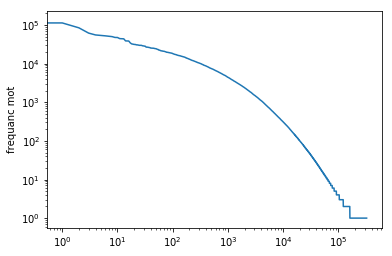

In [10]:
import matplotlib.pyplot as plt

freqs = [0]*len(Voc)
priviousOffset = 0 
for i, world in enumerate(Voc): 
    freqs[i] = (Voc[world]) -priviousOffset
    priviousOffset = int(Voc[world])
    
freqs.sort(reverse=True)

plt.plot(freqs)
plt.ylabel('frequanc mot')
plt.xscale('log')
plt.yscale('log')
plt.show()

on peut classer les mot de la fasson suivante: 

heighFreq = worldsFreq[10:100] # 50 000 > x > 15 000
middelFreq = worldsFreq[1000:5000] # 4500 > x > 800 
lowFreq =worldsFreq[50000: 150000] # 17 > x > 2 




## 3. Evaluation des performances 
### a) analyse de l'evalusiont du temps de calcule en fonction du nombre de resutat attenu

l'annalyse peut étres fait sur plusieur groups de mots: 

(4434, 'believes') (2077, 'coalition') (1434, 'matt')
(6411, 'build')
(7501, 'party') (6599, 'actually')(3802, 'jail') (4101, 'august')

In [35]:
from wordtraveller import query
from wordtraveller import faginsta, faginstopk
import time 

print(worldsFreq[3200]) 


words = [tuple[1]for tuple in worldsFreq[1000:1002]]
print (words)
#words= ['build']
#words= ['party','actually','jail','august']
print(worldsFreq[1000:1002])


# getting the posting lists for a set of words
sartingTime = time.time()
posting_lists_ordered_by_id = SortedDict()
posting_lists_ordered_by_score = SortedDict()
for word in words:
    orderedById, orderedByScore = query.get_posting_list(
    Voc, word, filemanager, returnPostingListOrderedByScore = True)
    if orderedById and orderedByScore:
        posting_lists_ordered_by_score[word] = orderedByScore
        posting_lists_ordered_by_id[word] = orderedById
print( "time for creating posting lists {}".format(time.time() - sartingTime))


# get the time        
totaleTimeTA = [0]*30
for k in range(1,30):
    sartingTime = time.time()
    resutle = faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, k*k)
    totaleTimeTA[k] = time.time() - sartingTime
print( 'TA donne')
#totaleTimefag = [0]*10
#for k in range(1,10):   
#    sartingTime = time.time()
#    faginstopk.find_fagins_top_k(posting_lists_ordered_by_id, posting_lists_ordered_by_score, k*k )
#    totaleTimefag[k] = time.time() - sartingTime
#print( 'Fag donne')

(1434, 'matt')
['believes', 'avoid']
[(4434, 'believes'), (4429, 'avoid')]
time for creating posting lists 0.05399060249328613
TA donne


In [36]:
from wordtraveller import naivetopk
totaleTimeNaiv = [0]*30
for k in range(1,30):   
    sartingTime = time.time()
    naivetopk.naive_top_k_algo(words, Voc, filemanager, 0, k*k )

    totaleTimeNaiv[k] = time.time() - sartingTime
print( 'Anive donne')

#totaleTimefagFull = [0]*10
#for k in range(1,10):   
#    sartingTime = time.time()
#    faginstopk.apply_top_k_algo(words, Voc, filemanager, 0 , k*k)
#    totaleTimefagFull[k] = time.time() - sartingTime
#print( 'Fag donne')

#totaleTimeTAFull = [0]*10
#for k in range(1,10):
#    sartingTime = time.time()
#    faginsta.apply_fagins_ta(words, Voc, filemanager, 0, k*k)
#    totaleTimeTAFull[k] = time.time() - sartingTime
#print( 'TA donne')

Anive donne


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841]


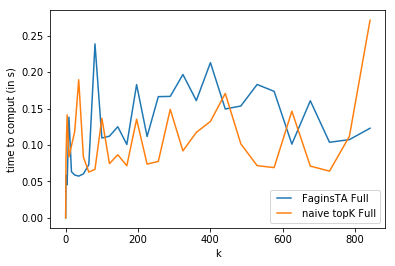

In [37]:
x = [0]*30
for i in range(1,30): 
    x[i] = i*i
    

print (x)
plt.plot(x,totaleTimeTA, label="FaginsTA Full")
#plt.plot(x,totaleTimefag, label="Fagins topK")
#lt.plot(x,totaleTimeTAFull, label="FaginsTA Full")
#lt.plot(x,totaleTimefagFull, label="Fagins topK Full")
plt.plot(x,totaleTimeNaiv, label="naive topK Full")

plt.ylabel('time to comput (in s)')
plt.xlabel('k')
plt.legend(numpoints=2)
plt.show()

### b) analyse de l'evalusiont du temps de calcule en fonction du nombre de mot dans la recherche 

In [26]:

from wordtraveller import query
from wordtraveller import faginsta, faginstopk
import time 

# define words 
WordsList= [0]*100
for i in range(0,100): 
    WordsList[i]= worldsFreq[10000+i][1]
WordsList.sort(reverse=True)

totaleTimeTAWords = [0]*10
totaleTimefagWords = [0]*10
totaleTimeNaivWords = [0]*10

for n in range(0,10):
    words = WordsList[0:n*n]
    # getting the posting lists for a set of words
    sartingTime = time.time()
    posting_lists_ordered_by_id = SortedDict()
    posting_lists_ordered_by_score = SortedDict()
    for word in words:
        orderedById, orderedByScore = query.get_posting_list(
        Voc, word, filemanager, returnPostingListOrderedByScore = True)
        if orderedById and orderedByScore:
            posting_lists_ordered_by_score[word] = orderedByScore
            posting_lists_ordered_by_id[word] = orderedById
    print( "time for creating posting lists {}".format(time.time() - sartingTime))
    
          
    
    sartingTime = time.time()
    faginsta.find_fagins_ta(posting_lists_ordered_by_id, posting_lists_ordered_by_score, 0, 30 )
    totaleTimeTAWords[n] = time.time() - sartingTime

    sartingTime = time.time()
    faginstopk.find_fagins_top_k(posting_lists_ordered_by_id, posting_lists_ordered_by_score, 30 )
    totaleTimefagWords[n] = time.time() - sartingTime
    
    resutle = faginstavf.apply_fagins_ta(['party','actually','jail','august'], Voc, filemanager, 0, 100)
    
    sartingTime = time.time()
    naivetopk.naive_top_k_algo(words, Voc, filemanager, 0, 30 )
    totaleTimeNaivWords[n] = time.time() - sartingTime






time for creating posting lists 0.0
time for creating posting lists 0.007981300354003906
time for creating posting lists 0.009990453720092773
time for creating posting lists 0.10933899879455566
time for creating posting lists 0.03529095649719238
time for creating posting lists 0.06855964660644531
time for creating posting lists 0.07222557067871094
time for creating posting lists 0.0962975025177002
time for creating posting lists 0.198822021484375
time for creating posting lists 0.1602339744567871


In [25]:
x = [0]*10
for i in range(1,10): 
    x[i] = i*i
    

print (x)
plt.plot(x,totaleTimeTAWords, label="FaginsTA")
plt.plot(x,totaleTimefagWords, label="Fagins topK")


plt.ylabel('time to comput (in s)')
plt.xlabel('n Nember of words in query')
plt.legend(numpoints=2)
plt.show()

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


NameError: name 'totaleTimeTAWords' is not defined

### c) analyse de l'evalusiont du temps de calcule en fonction de la tailles des posting lists

In [8]:
from wordtraveller import query
from wordtraveller import faginsta, faginstopk,naivetopk
import time 

# define words 
ListWorlds = [[0] * 2 for _ in range(10)]
for i in range(1,11): 
    ListWorlds[i-1] = [world[1] for world in worldsFreq if world[0]==i*100][0:2]
print (ListWorlds)

totaleTimeTAPL = [0]*10
totaleTimefagPL = [0]*10
totaleTimeNaivPL = [0]*10

for n in range(0,10):
    words = ListWorlds[n]
    # getting the posting lists for a set of words
    sartingTime = time.time()
    posting_lists_ordered_by_id = SortedDict()
    posting_lists_ordered_by_score = SortedDict()
    for word in words:
        orderedById, orderedByScore = query.get_posting_list(
        Voc, word, filemanager, returnPostingListOrderedByScore = True)
        if orderedById and orderedByScore:
            posting_lists_ordered_by_score[word] = orderedByScore
            posting_lists_ordered_by_id[word] = orderedById
    print( "time for creating posting lists {}".format(time.time() - sartingTime))
    
          
    
    sartingTime = time.time()
    faginsta.find_fagins_ta(posting_lists_ordered_by_id, posting_lists_ordered_by_score, 0, 15 )
    totaleTimeTAPL[n] = time.time() - sartingTime

    sartingTime = time.time()
    faginstopk.find_fagins_top_k(posting_lists_ordered_by_id, posting_lists_ordered_by_score, 15 )
    totaleTimefagPL[n] = time.time() - sartingTime
    
    sartingTime = time.time()
    naivetopk.naive_top_k_algo(words, Voc, filemanager, 0, 15 )
    totaleTimeNaivPL[n] = time.time() - sartingTime






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adril\AppData\Local\Temp...
[nltk_data]   Package stopwords is already up-to-date!
[['woodstock', 'wits'], ['weed', 'uh'], ['vertical', 'troublesome'], ['woody', 'turnover'], ['reopened', 'mira'], ['wives', 'scouts'], ['surplus', 'province'], ['withdrawal', 'trends'], ['trials', 'single-family'], ['loves', 'electronics']]
time for creating posting lists 0.009007692337036133
time for creating posting lists 0.001994609832763672
time for creating posting lists 0.0019931793212890625
time for creating posting lists 0.006272554397583008
time for creating posting lists 0.006012678146362305
time for creating posting lists 0.007979393005371094
time for creating posting lists 0.008753538131713867
time for creating posting lists 0.009363174438476562
time for creating posting lists 0.008299827575683594
time for creating posting lists 0.008942842483520508


[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
[0.009974002838134766, 0.030919551849365234, 0.08078455924987793, 0.1246638298034668, 0.010941743850708008, 0.015955209732055664, 0.016985177993774414, 0.7987916469573975, 0.032911062240600586, 0.028920650482177734]


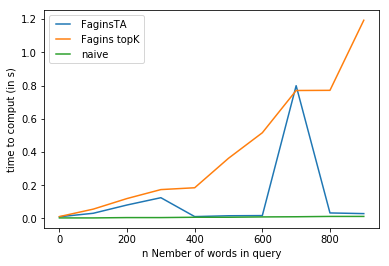

In [9]:
x = [0]*10
for i in range(1,10): 
    x[i] = i*100
    

print (x)
plt.plot(x,totaleTimeTAPL, label="FaginsTA")
plt.plot(x,totaleTimefagPL, label="Fagins topK") 
plt.plot(x,totaleTimeNaivPL, label="naive")
print(totaleTimeTAPL)


plt.ylabel('time to comput (in s)')
plt.xlabel('n Nember of words in query')
plt.legend(numpoints=2)
plt.show()



In [6]:
import time
from wordtraveller import faginstavf,naivetopk

print(faginstavf.test())
sartingTime = time.time()
resutle = faginstavf.apply_fagins_ta(['party','actually','jail','august'], Voc, filemanager, 0, 100)
print ('time{}'.format(time.time() - sartingTime))



aspected =  naivetopk.naive_top_k_algo(['party','actually','jail','august'], Voc, filemanager, 0, 100)


is_equal = True 
aspected.sort()
resutle.sort()
if len(aspected) == len(resutle) : 
    for i in range(0, len(resutle)): 
        if not (aspected[i][0]== resutle[i][0] and aspected[i][1]== resutle[i][1]):
            is_equal= False
else: 
    is_equal = False
    
if not is_equal :
    print ("has not the same tuples")
else: 
    print("has the same tuples")
    
    

   



adrien
time0.20046281814575195
has the same tuples


In [6]:
from sortedcontainers import SortedList
sl = SortedList([(8.822835922241211, (215344, 'actually')), (13.092916488647461, (60492, 'august')), (15.08728313446045, (238923, 'party')), (15.233997344970703, (241863, 'august'))])

print (sl.pop())

(15.233997344970703, (241863, 'august'))


In [15]:
worldsFreq[50002]

(17, 'entrust')